In [1]:
%matplotlib inline
from grale.all_nb import *
import matplotlib.pyplot as plt
import numpy as np
import os

renderers.debugDirectStderr = True
renderers.debugOutput = True

Set 'threads' as default renderer for lensplane and mass density
Set default angular unit in plotting to arcsec
Set feedback style to 'notebook'


In [2]:
class OpenCLPotentialRenderer(renderers.Renderer):
    
    def __init__(self, feedbackObject = None):
        super(OpenCLPotentialRenderer, self).__init__([ "grale_potential_opencl" ], "LENSPLANE", feedbackObject = feedbackObject)

In [56]:
Dd = 1000*DIST_MPC
Ds = 1300*DIST_MPC
Dds = 900*DIST_MPC

#l = lenses.PlummerLens(Dd, { "mass": 1e15*MASS_SUN, "width": 5*ANGLE_ARCSEC})
#l = lenses.MassSheetLens(Dd, { "Ds": Ds, "Dds": Dds })
#l = lenses.MultiplePlummerLens(Dd, [
#    { "mass": 0.7e15*MASS_SUN, "width":3*ANGLE_ARCSEC, "x": -2*ANGLE_ARCSEC, "y": 1*ANGLE_ARCSEC },
#    { "mass": 0.4e15*MASS_SUN, "width":4*ANGLE_ARCSEC, "x": 3*ANGLE_ARCSEC, "y": -1*ANGLE_ARCSEC },
#])

#l = lenses.NSIELens(Dd, { "velocityDispersion": 400000, "ellipticity": 0.8, "coreRadius": 1*ANGLE_ARCSEC})
l = lenses.SISLens(Dd, { "velocityDispersion": 400000 })

#l = lenses.CompositeLens(Dd, [
#    {"lens": lenses.PlummerLens(Dd, { "mass": 0.7e15*MASS_SUN, "width":3*ANGLE_ARCSEC}),
#      "x": -2*ANGLE_ARCSEC, "y": 1*ANGLE_ARCSEC, "angle": 0, "factor": 1},
#    {"lens": lenses.PlummerLens(Dd, { "mass": 0.4e15*MASS_SUN, "width":4*ANGLE_ARCSEC}),
#      "x": 3*ANGLE_ARCSEC, "y": -1*ANGLE_ARCSEC, "angle":0, "factor": 1}
#])

In [57]:
os.environ["GRALE_OPENCL_PLATFORM"] = "0"
os.environ["GRALE_EXPERIMENTAL_OPENCLPARAMS"] = "1"
lpNew = images.LensPlane(l, -V(10,10)*ANGLE_ARCSEC, V(10,10)*ANGLE_ARCSEC, 16, 16, "OpenCL")
del os.environ["GRALE_EXPERIMENTAL_OPENCLPARAMS"]
lpOld = images.LensPlane(l, -V(10,10)*ANGLE_ARCSEC, V(10,10)*ANGLE_ARCSEC, 16, 16, "OpenCL")

lpCPU = images.LensPlane(l, -V(10,10)*ANGLE_ARCSEC, V(10,10)*ANGLE_ARCSEC, 16, 16)

Text(value='')

INFO: Found 1 GPU devices
INFO: GPU Devices:
   0x561104d3b7f0: Quadro K620
OpenCL initialized
Reading lens of 36 bytes
Reading rendering type (grid/separate input points)
Reading corner info and resolution
Rendering 16x16 from (-4.84814e-05,-4.84814e-05) - (4.84814e-05,4.84814e-05)
typedef struct
{
 	float alphaX;
 	float alphaY;
	float potential;
 	float axx;
	float ayy;
 	float axy;
} LensQuantities;

LensQuantities clSISLensProgram(float2 coord, __global const int *pIntParams, __global const float *pFloatParams)
{
	float l = length(coord);
	float l2 = coord.x*coord.x+coord.y*coord.y;
	float scaledVel = pFloatParams[0];
	float scaledEinsteinRad = ((float)0.0625)*scaledVel*scaledVel;
	float factor = scaledEinsteinRad/l;
	
	LensQuantities r;
	r.alphaX = factor*coord.x;
	r.alphaY = factor*coord.y;

	float potentialFactor = (float)1;
	r.potential = scaledEinsteinRad*l*potentialFactor;

	r.axx = factor*(1.0f-coord.x*coord.x/l2);
	r.ayy = factor*(1.0f-coord.y*coord.y/l2);
	r.axy = -factor

Ignoring exception when terminating program: Command '['pgrep', '-P', '16073']' returned non-zero exit status 1.


Text(value='')

INFO: Found 1 GPU devices
INFO: GPU Devices:
   0x562c309937f0: Quadro K620
OpenCL initialized
Reading lens of 36 bytes
Reading rendering type (grid/separate input points)
Reading corner info and resolution
Rendering 16x16 from (-4.84814e-05,-4.84814e-05) - (4.84814e-05,4.84814e-05)
typedef struct
{
 	float alphaX;
 	float alphaY;
	float potential;
 	float axx;
	float ayy;
 	float axy;
} LensQuantities;
LensQuantities clSISLensProgram(float2 coord, __global const int *pIntParams, __global const float *pFloatParams)
{
	float l = length(coord);
	float l2 = coord.x*coord.x+coord.y*coord.y;
	float factor = pFloatParams[0]/l;

	LensQuantities r;
	r.alphaX = factor*coord.x;
	r.alphaY = factor*coord.y;
	float potentialFactor = (float)1;
	r.potential = pFloatParams[0]*l*potentialFactor;
	r.axx = factor*(1.0f-coord.x*coord.x/l2);
	r.ayy = factor*(1.0f-coord.y*coord.y/l2);
	r.axy = -factor*coord.x*coord.y/l2;
	return r;
}

__kernel void renderLensPlane(float2 startCoord, float2 step, int numX, i

Ignoring exception when terminating program: Command '['pgrep', '-P', '16090']' returned non-zero exit status 1.


Text(value='')

Reading lens of 36 bytes
Reading rendering type (grid/separate input points)
Reading corner info and resolution
Rendering 16x16 from (-4.84814e-05,-4.84814e-05) - (4.84814e-05,4.84814e-05)
Number of threads: 8
Writing result
Finishing, waiting for exit command


FloatProgress(value=0.0)

Ignoring exception when terminating program: Command '['pgrep', '-P', '16106']' returned non-zero exit status 1.


Renderer exiting as expected.


In [58]:
lpNew.getAlphas()["alpha_x"]/ANGLE_ARCSEC

array([[-3.26286124, -3.02209986, -2.72877833, -2.37408   , -1.95135541,
        -1.45919608, -0.90495503, -0.30694437,  0.30694385,  0.90495455,
         1.45919553,  1.95135486,  2.37407972,  2.72877778,  3.02209959,
         3.26286124],
       [-3.48703807, -3.26286097, -2.98062486, -2.62655252, -2.1876778 ,
        -1.65646697, -1.03758793, -0.35390725,  0.35390666,  1.03758731,
         1.65646642,  2.18767753,  2.62655225,  2.98062459,  3.26286097,
         3.4870378 ],
       [-3.72106128, -3.52255656, -3.26286097, -2.92200121, -2.47734902,
        -1.90944502, -1.2141247 , -0.41776688,  0.4177662 ,  1.21412401,
         1.90944461,  2.47734847,  2.92200093,  3.26286097,  3.52255601,
         3.72106073],
       [-3.95679991, -3.79390911, -3.57133466, -3.26286097, -2.83295718,
        -2.24094233, -1.45919621, -0.50957368,  0.50957285,  1.45919539,
         2.24094192,  2.83295635,  3.26286069,  3.57133466,  3.79390883,
         3.95680018],
       [-4.18147565, -4.06283004, -3

In [59]:
np.max(np.abs(lpNew.getAlphas()["alpha_x"] - lpOld.getAlphas()["alpha_x"]))

0.0

In [60]:
np.max(np.abs(lpNew.getAlphas()["alpha_y"] - lpOld.getAlphas()["alpha_y"]))

0.0

In [61]:
( np.max(np.abs(lpNew.getAlphaVectorDerivatives()["alpha_xx"] - lpCPU.getAlphaVectorDerivatives()["alpha_xx"])),
  np.max(np.abs(lpNew.getAlphaVectorDerivatives()["alpha_yy"] - lpCPU.getAlphaVectorDerivatives()["alpha_yy"])),
  np.max(np.abs(lpNew.getAlphaVectorDerivatives()["alpha_xy"] - lpCPU.getAlphaVectorDerivatives()["alpha_xy"])) )

(4.223890386789719e-06, 4.223890386789719e-06, 1.8397045966622727e-06)

In [62]:
np.max(np.abs(lpNew.getAlphaVectorDerivatives()["alpha_xx"] 
            - lpOld.getAlphaVectorDerivatives()["alpha_xx"]))

0.0

In [63]:
np.max(np.abs(lpNew.getAlphaVectorDerivatives()["alpha_yy"] 
            - lpOld.getAlphaVectorDerivatives()["alpha_yy"]))

0.0

In [64]:
np.max(np.abs(lpNew.getAlphaVectorDerivatives()["alpha_xy"] 
            - lpOld.getAlphaVectorDerivatives()["alpha_xy"]))

0.0

In [65]:
ipNew = images.ImagePlane(lpNew, Ds, Dds)
ipOld = images.ImagePlane(lpOld, Ds, Dds)
ipCPU = images.ImagePlane(lpCPU, Ds, Dds)

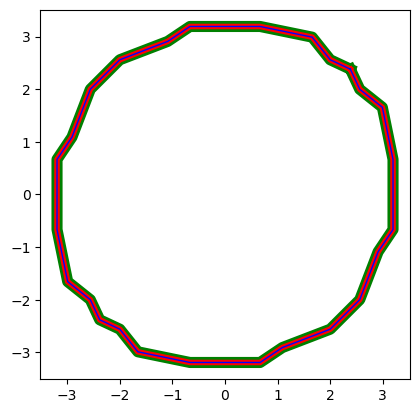

In [66]:
def drawLines(ip : images.ImagePlane, color, lw):
    lines = ip.getCriticalLines()
    for part in lines:
        part = np.array(part)/ANGLE_ARCSEC
        plt.plot(part[:,0], part[:,1], "-", color=color, lw=lw)

drawLines(ipCPU, "green", 8)
drawLines(ipNew, "red", 4)
drawLines(ipOld, "blue", 1)
plt.gca().set_aspect("equal")

In [67]:
potRend = OpenCLPotentialRenderer()

In [68]:
def getPotentialValues(l : lenses.GravitationalLens, bl, tr, numX, numY, useOpenCL):
    if not useOpenCL:
        thetas = util.createThetaGrid(bl, tr, numX, numY)
        phi = l.getProjectedPotential(1,1,thetas)
        phi -= np.min(phi)
        return phi
    
    b = potRend.render(l.toBytes(), bl, tr, numX, numY)
    buf = np.frombuffer(b, dtype=np.float64).copy()
    buf -= np.min(buf)
    buf = buf.reshape((numY, numY))
    return buf

In [69]:
os.environ["GRALE_EXPERIMENTAL_OPENCLPARAMS"] = "1"
phiOclNew = getPotentialValues(l, -V(10,10)*ANGLE_ARCSEC, V(10,10)*ANGLE_ARCSEC, 16, 16, True)
del os.environ["GRALE_EXPERIMENTAL_OPENCLPARAMS"]
phiOclOld = getPotentialValues(l, -V(10,10)*ANGLE_ARCSEC, V(10,10)*ANGLE_ARCSEC, 16, 16, True)
phiCPU = getPotentialValues(l, -V(10,10)*ANGLE_ARCSEC, V(10,10)*ANGLE_ARCSEC, 16, 16, False)

INFO: Found 1 GPU devices
INFO: GPU Devices:
   0x560cb60717f0: Quadro K620
OpenCL initialized
Reading lens of 36 bytes
Reading rendering type (grid/separate input points)
Reading corner info and resolution
Rendering 16x16 from (-4.84814e-05,-4.84814e-05) - (4.84814e-05,4.84814e-05)
Integer parameters (0)
  -12345

Float parameters (1)
  4
  -12345
typedef struct
{
 	float alphaX;
 	float alphaY;
	float potential;
 	float axx;
	float ayy;
 	float axy;
} LensQuantities;

LensQuantities clSISLensProgram(float2 coord, __global const int *pIntParams, __global const float *pFloatParams)
{
	float l = length(coord);
	float l2 = coord.x*coord.x+coord.y*coord.y;
	float scaledVel = pFloatParams[0];
	float scaledEinsteinRad = ((float)0.0625)*scaledVel*scaledVel;
	float factor = scaledEinsteinRad/l;
	
	LensQuantities r;
	r.alphaX = factor*coord.x;
	r.alphaY = factor*coord.y;

	float potentialFactor = (float)1;
	r.potential = scaledEinsteinRad*l*potentialFactor;

	r.axx = factor*(1.0f-coord.x*coord

Ignoring exception when terminating program: Command '['pgrep', '-P', '16155']' returned non-zero exit status 1.


INFO: Found 1 GPU devices
INFO: GPU Devices:
   0x55e6958217f0: Quadro K620
OpenCL initialized
Reading lens of 36 bytes
Reading rendering type (grid/separate input points)
Reading corner info and resolution
Rendering 16x16 from (-4.84814e-05,-4.84814e-05) - (4.84814e-05,4.84814e-05)
Integer parameters (0)
  -12345

Float parameters (1)
  1
  -12345
typedef struct
{
 	float alphaX;
 	float alphaY;
	float potential;
 	float axx;
	float ayy;
 	float axy;
} LensQuantities;
LensQuantities clSISLensProgram(float2 coord, __global const int *pIntParams, __global const float *pFloatParams)
{
	float l = length(coord);
	float l2 = coord.x*coord.x+coord.y*coord.y;
	float factor = pFloatParams[0]/l;

	LensQuantities r;
	r.alphaX = factor*coord.x;
	r.alphaY = factor*coord.y;
	float potentialFactor = (float)1;
	r.potential = pFloatParams[0]*l*potentialFactor;
	r.axx = factor*(1.0f-coord.x*coord.x/l2);
	r.ayy = factor*(1.0f-coord.y*coord.y/l2);
	r.axy = -factor*coord.x*coord.y/l2;
	return r;
}

__kern

Ignoring exception when terminating program: Command '['pgrep', '-P', '16171']' returned non-zero exit status 1.


In [70]:
np.max(np.abs(phiOclNew - phiOclOld))

0.0

In [71]:
np.max(np.abs(phiCPU/ANGLE_ARCSEC**2 - phiOclNew/ANGLE_ARCSEC**2))

8.423022023862359e-06

In [72]:
(phiOclNew/ANGLE_ARCSEC**2)[0,0],(phiCPU/ANGLE_ARCSEC**2)[0,0]

(60.90674413227218, 60.9067391171244)